In [18]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [19]:
ASSY37WDCB21shank0 = (
(0,0),
(0,25),
(0,50),
(0,75),
(0,100),
(0,125),
(0,150),
(0,175),
(-21, 12.5),
(-21, 37.5),
(-21, 62.5),
(-21, 87.5),
(-21, 112.5),
(-21, 137.5),
(-21, 162.5),
(-21, 187.5)
)
shank0_channels = (3,5,9,11,7,1,13,10,16,12,8,6,2,4,14)
ASSY37WDCB21shank1 = [(x + 250, y) for (x,y) in ASSY37WDCB21shank0]
shank1_channels = (29,28,30,32,31,26,20,23,17,21,22,25,27,24,19,8)

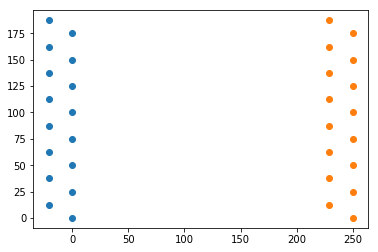

In [20]:
plt.plot([x for (x,y) in ASSY37WDCB21shank0],[y for (x,y) in ASSY37WDCB21shank0],'o')
plt.plot([x for (x,y) in ASSY37WDCB21shank1],[y for (x,y) in ASSY37WDCB21shank1],'o')


# Generate and process adjacencies/geometries
Accounts for the channel mapping between the probe and the intan board.

In [21]:
#produces pairs of probe site adjacencies from the electrode coordinates in physical space through Delauney tesselation,
#subject to a maximum site spacing (in microns) of max_edgelength. 
import numpy as np
import scipy.spatial as spatial

def adjacency_from_geometry(coords, channels, max_edgelength = 40, correspondence = None):
        
    c = np.array(coords)
    tess = spatial.Delaunay(coords)
    indices, indptr = tess.vertex_neighbor_vertices
    adjs = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                if(spatial.distance.euclidean(c[k], c[j]) < max_edgelength):
                    adjs.append((channels[k],channels[j]))
            except:
                pass
    return adjs
    

In [22]:
nexus = ['G',23,25,27,29,31,19,17,21,11,15,13,1,3,5,7,9,'R','R',24,26,28,30,32,20,18,22,12,16,14,2,4,6,
         8,10,'G']

In [23]:
intan = ['G', 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 'R', 'R',24, 25, 26,
         27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 'G']

In [24]:
def translate_adjacencies(adjacencies, correspondence=None):
    if correspondence is not None:
        for i,(x,y) in enumerate(adjacencies):
            adjacencies[i] = (translate(x, correspondence), translate(y,correspondence))
    return adjacencies

def translate(val, correspondence):
    return [y for (x,y) in correspondence if x == val][0]

def geometries(channels, geo):
    geometry = {}
    for i,ch in enumerate(channels):
        geometry[ch] = geo[i]
    return geometry

In [30]:
shank0_adj = adjacency_from_geometry(ASSY37WDCB21shank0, shank0_channels, 50)
shank1_adj = adjacency_from_geometry(ASSY37WDCB21shank1, shank1_channels, 50)
cor = list(zip(nexus, intan))

channel_groups_intan = {}
channel_groups_intan[0] = {}
channel_groups_intan[0]['channels'] = [translate(ch, cor) for ch in shank0_channels]
channel_groups_intan[0]['graph'] = translate_adjacencies(shank0_adj,cor)
channel_groups_intan[0]['geometry'] = geometries([translate(ch, cor) for ch in shank0_channels], ASSY37WDCB21shank0)
channel_groups_intan[1] = {}
channel_groups_intan[1]['channels'] = [translate(ch, cor) for ch in shank1_channels]
channel_groups_intan[1]['graph'] = translate_adjacencies(shank1_adj,cor)
channel_groups_intan[1]['geometry'] = geometries([translate(ch, cor) for ch in shank1_channels], ASSY37WDCB21shank1)

channel_groups = {}
channel_groups[0] = {}
channel_groups[0]['channels'] = shank0_channels
channel_groups[0]['graph'] = shank0_adj
channel_groups[0]['geometry'] = geometries(shank0_channels, ASSY37WDCB21shank0)
channel_groups[1] = {}
channel_groups[1]['channels'] = shank1_channels
channel_groups[1]['graph'] = shank1_adj
channel_groups[1]['geometry'] = geometries(shank1_channels, ASSY37WDCB21shank1)

In [31]:
channel_groups_intan

{0: {'channels': [11, 10, 8, 15, 9, 12, 13, 7, 1, 0, 6, 5, 3, 4, 2],
  'geometry': {0: (-21, 37.5),
   1: (-21, 12.5),
   2: (-21, 162.5),
   3: (-21, 112.5),
   4: (-21, 137.5),
   5: (-21, 87.5),
   6: (-21, 62.5),
   7: (0, 175),
   8: (0, 50),
   9: (0, 100),
   10: (0, 25),
   11: (0, 0),
   12: (0, 125),
   13: (0, 150),
   15: (0, 75)},
  'graph': [(11, 10),
   (11, 1),
   (10, 11),
   (10, 1),
   (10, 0),
   (10, 8),
   (8, 0),
   (8, 10),
   (8, 15),
   (8, 6),
   (15, 5),
   (15, 9),
   (15, 6),
   (15, 8),
   (9, 3),
   (9, 5),
   (9, 12),
   (9, 15),
   (12, 3),
   (12, 9),
   (12, 4),
   (12, 13),
   (13, 4),
   (13, 2),
   (13, 7),
   (13, 12),
   (7, 2),
   (7, 13),
   (1, 11),
   (1, 10),
   (1, 0),
   (0, 10),
   (0, 8),
   (0, 1),
   (0, 6),
   (6, 15),
   (6, 8),
   (6, 0),
   (6, 5),
   (5, 3),
   (5, 9),
   (5, 15),
   (5, 6),
   (3, 5),
   (3, 9),
   (3, 12),
   (3, 4),
   (4, 12),
   (4, 3),
   (4, 13),
   (4, 2),
   (2, 7),
   (2, 4),
   (2, 13)]},
 1: {'channel

In [32]:
channel_groups

{0: {'channels': (3, 5, 9, 11, 7, 1, 13, 10, 16, 12, 8, 6, 2, 4, 14),
  'geometry': {1: (0, 125),
   2: (-21, 112.5),
   3: (0, 0),
   4: (-21, 137.5),
   5: (0, 25),
   6: (-21, 87.5),
   7: (0, 100),
   8: (-21, 62.5),
   9: (0, 50),
   10: (0, 175),
   11: (0, 75),
   12: (-21, 37.5),
   13: (0, 150),
   14: (-21, 162.5),
   16: (-21, 12.5)},
  'graph': [(11, 10),
   (11, 1),
   (10, 11),
   (10, 1),
   (10, 0),
   (10, 8),
   (8, 0),
   (8, 10),
   (8, 15),
   (8, 6),
   (15, 5),
   (15, 9),
   (15, 6),
   (15, 8),
   (9, 3),
   (9, 5),
   (9, 12),
   (9, 15),
   (12, 3),
   (12, 9),
   (12, 4),
   (12, 13),
   (13, 4),
   (13, 2),
   (13, 7),
   (13, 12),
   (7, 2),
   (7, 13),
   (1, 11),
   (1, 10),
   (1, 0),
   (0, 10),
   (0, 8),
   (0, 1),
   (0, 6),
   (6, 15),
   (6, 8),
   (6, 0),
   (6, 5),
   (5, 3),
   (5, 9),
   (5, 15),
   (5, 6),
   (3, 5),
   (3, 9),
   (3, 12),
   (3, 4),
   (4, 12),
   (4, 3),
   (4, 13),
   (4, 2),
   (2, 7),
   (2, 4),
   (2, 13)]},
 1: {'chann